- Yêu cầu thống kê (visualize dữ liệu nếu có thể):
    - Các hãng đang cung cấp Card đồ họa, số lượng sản phẩm của mỗi hãng. 
    - Phân bố giá của các sản phẩm (Mức giá phổ biến là bao nhiêu)
    - Phân bố giá sản phẩm theo hãng
    - Biểu diễn mối liên hệ giữa giá sản phẩm và rating của người dùng

In [1]:
# import libraries

from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Credentials to database connection
hostname="localhost"
dbname="db_project2"
uname="tanlee"
pwd="17012021*Th"


# Create SQLAlchemy engine to connect to MySQL Database

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}" \
                       .format(host=hostname, db=dbname, user=uname, pw=pwd))

# Retrieve data from MysQL database

df = pd.read_sql_query("select * from products", engine)
df.head()

,item_id,title,brand,rating,number_of_rating,price_current,shipping,image_url,details,total_price
0,14-932-580,GIGABYTE GeForce RTX 4070 Ti GAMING OC 12G Gra...,GIGABYTE,4.9,59,859.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"{'Max_Resolution': ' 7680 x 4320', 'Display_Po...",859.99
1,14-932-561,GIGABYTE Gaming GeForce RTX 4080 16GB GDDR6X P...,GIGABYTE,4.3,109,1188.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"{'Max_Resolution': ' 7680 x 4320', 'Display_Po...",1188.99
2,9SIAZUEJC49634,Yeston Radeon RX 6750 XT 12GB D6 GDDR6 192bit ...,yeston,5,2,429.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"{'Display_Port': ' 3 x DisplayPort 1.4', 'HDMI...",429.99
3,14-932-562,GIGABYTE EAGLE OC GeForce RTX 4080 16GB GDDR6X...,GIGABYTE,4,41,1149.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"{'Max_Resolution': ' 7680 x 4320', 'Display_Po...",1149.99
4,9SIAMFBJK56891,ZOTAC GAMING GeForce RTX 3050 AMP 8GB GDDR6 12...,ZOTAC,not rating,0,209.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,"{'Max_Resolution': ' 7680 x 4320', 'Display_Po...",209.99


In [3]:
df.describe()

,price_current,total_price
count,3602.000000,3602.000000
mean,594.697451,603.574944
std,462.560083,461.943639
min,0.000000,0.000000
25%,280.000000,289.992500
50%,469.640000,489.000000
75%,749.000000,749.990000
max,5239.290000,5239.290000


In [4]:
df.dtypes

item_id              object
title                object
brand                object
rating               object
number_of_rating     object
price_current       float64
shipping             object
image_url            object
details              object
total_price         float64
dtype: object

## 1. Các hãng đang cung cấp Card đồ họa, số lượng sản phẩm của mỗi hãng. 

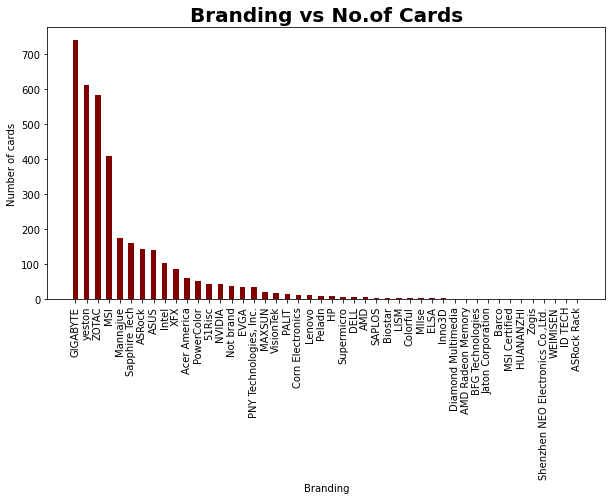

In [5]:
fig = plt.figure(figsize = (10, 5))
x = df['brand'].unique()
y = df['brand'].value_counts()

plt.bar(x, y, color='maroon', width= 0.5)
plt.xlabel("Branding")
plt.ylabel('Number of cards')
plt.title('Branding vs No.of Cards', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## 2. Phân bố giá của các sản phẩm (Mức giá phổ biến là bao nhiêu)

Text(0.5, 0, 'Price ($)')

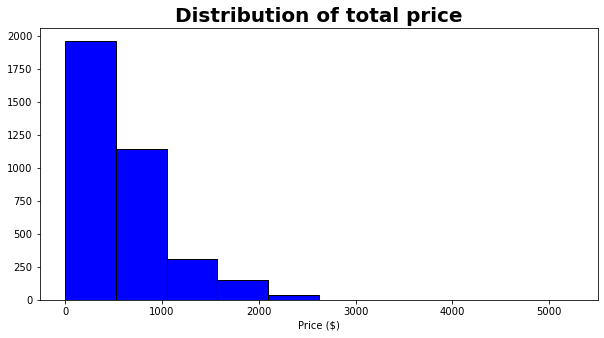

In [6]:
fig = plt.figure(figsize = (10, 5))

plt.hist(df['total_price'], color='blue', ec='black', bins=10)
plt.title('Distribution of total price',fontweight="bold", fontsize=20)
plt.xlabel('Price ($)')

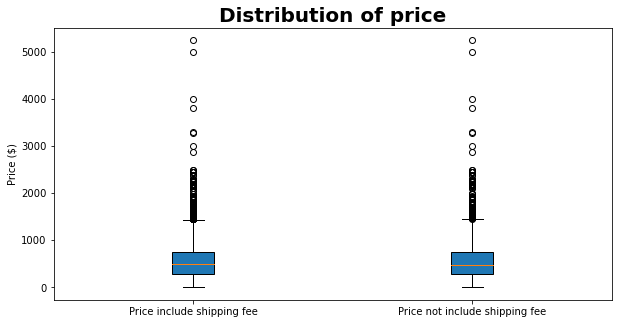

In [7]:
fig = plt.figure(figsize = (10, 5))
plt.boxplot([df['total_price'], df['price_current']], patch_artist=True, \
            labels=['Price include shipping fee', 'Price not include shipping fee'])
plt.ylabel('Price ($)')
plt.title('Distribution of price', fontweight="bold", fontsize=20)
plt.show()

## 3. Phân bố giá sản phẩm theo hãng


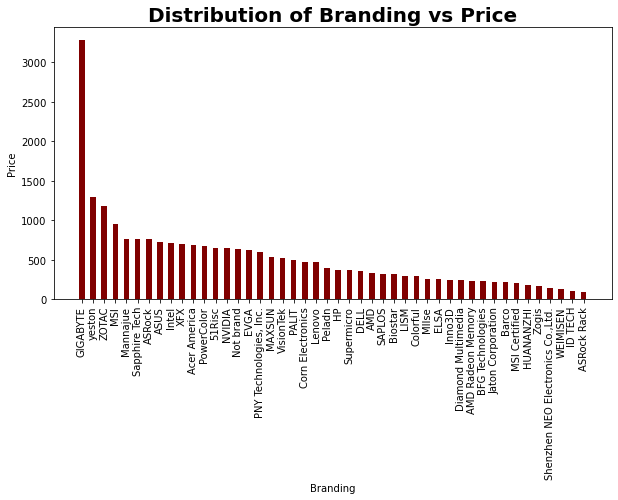

In [8]:
fig = plt.figure(figsize = (10, 5))
x = df['brand'].unique()
y = df.groupby(by='brand').mean()['total_price'].sort_values(ascending=False)

plt.bar(x, y, color='maroon', width= 0.5)
plt.xlabel("Branding")
plt.ylabel('Price')
plt.title('Distribution of Branding vs Price', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## 4. Biểu diễn mối liên hệ giữa giá sản phẩm và rating của người dùng

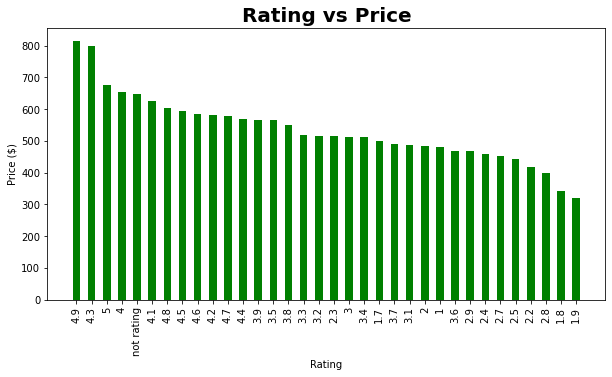

In [9]:
fig = plt.figure(figsize = (10, 5))

x = df['rating'].unique()
y = df.groupby(by='rating').mean()['total_price'].sort_values(ascending=False)

plt.bar(x, y, color='green', width= 0.5)
plt.xlabel("Rating")
plt.ylabel('Price ($)')
plt.title('Rating vs Price', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

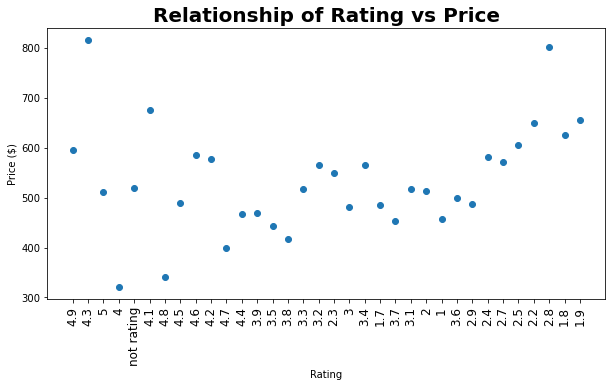

In [10]:
fig = plt.figure(figsize = (10, 5))

x = df['rating'].unique()
y = df.groupby(by='rating').mean()['total_price']

plt.scatter(x, y)
plt.title('Relationship of Rating vs Price', fontsize=20, fontweight='bold')
plt.xticks(rotation=90, size='large')
plt.xlabel('Rating')
plt.ylabel('Price ($)')
plt.show()